In [1]:
!pip install amazon-textract-textractor[pdfium]==1.8.2 --quiet

In [2]:
import sagemaker

# Get the SageMaker session and default bucket
sagemaker_session = sagemaker.Session()
default_bucket = sagemaker_session.default_bucket()
print(f"Default sagemaker bucket: {default_bucket}")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
Default sagemaker bucket: sagemaker-us-east-1-626723862963


In [3]:
#download a pdf if required
sample_paper_url = "https://arxiv.org/pdf/1706.03762"
!wget -O ./data/my_document.pdf {sample_paper_url} --no-check-certificate

--2024-08-21 12:05:08--  https://arxiv.org/pdf/1706.03762
Resolving arxiv.org (arxiv.org)... 151.101.3.42, 151.101.131.42, 151.101.67.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.3.42|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘./data/my_document.pdf’

./data/my_document. 100%[===================>]   2.11M  --.-KB/s    in 0.009s  

2024-08-21 12:05:08 (228 MB/s) - ‘./data/my_document.pdf’ saved [2215244/2215244]



In [4]:
#copy data folder with sample pdf files to S3"
!aws s3 sync ./data s3://{default_bucket}/data

In [5]:
document = "data/paper-sample-10-pages.pdf"
document = "data/my_document.pdf"
document_s3_url = f"s3://{default_bucket}/{document}"

In [6]:
import os
from textractor import Textractor
from textractor.data.constants import TextractFeatures

In [7]:
from textractor import Textractor
from textractor.data.constants import TextractFeatures
from textractor.data.text_linearization_config import TextLinearizationConfig

extractor = Textractor()
document = extractor.start_document_analysis(
    document_s3_url,    
    features=[TextractFeatures.LAYOUT, TextractFeatures.FORMS, TextractFeatures.TABLES],
    save_image=True
)

In [8]:
document

## Using Layout Analysis

Try the [interactive Textract Demo for layout analysis](https://us-east-1.console.aws.amazon.com/textract/home?region=us-east-1#/demo) in the AWS Console.
![alt text](images/layout_analysis_attention_page_0.png "Layout analysis of first page")


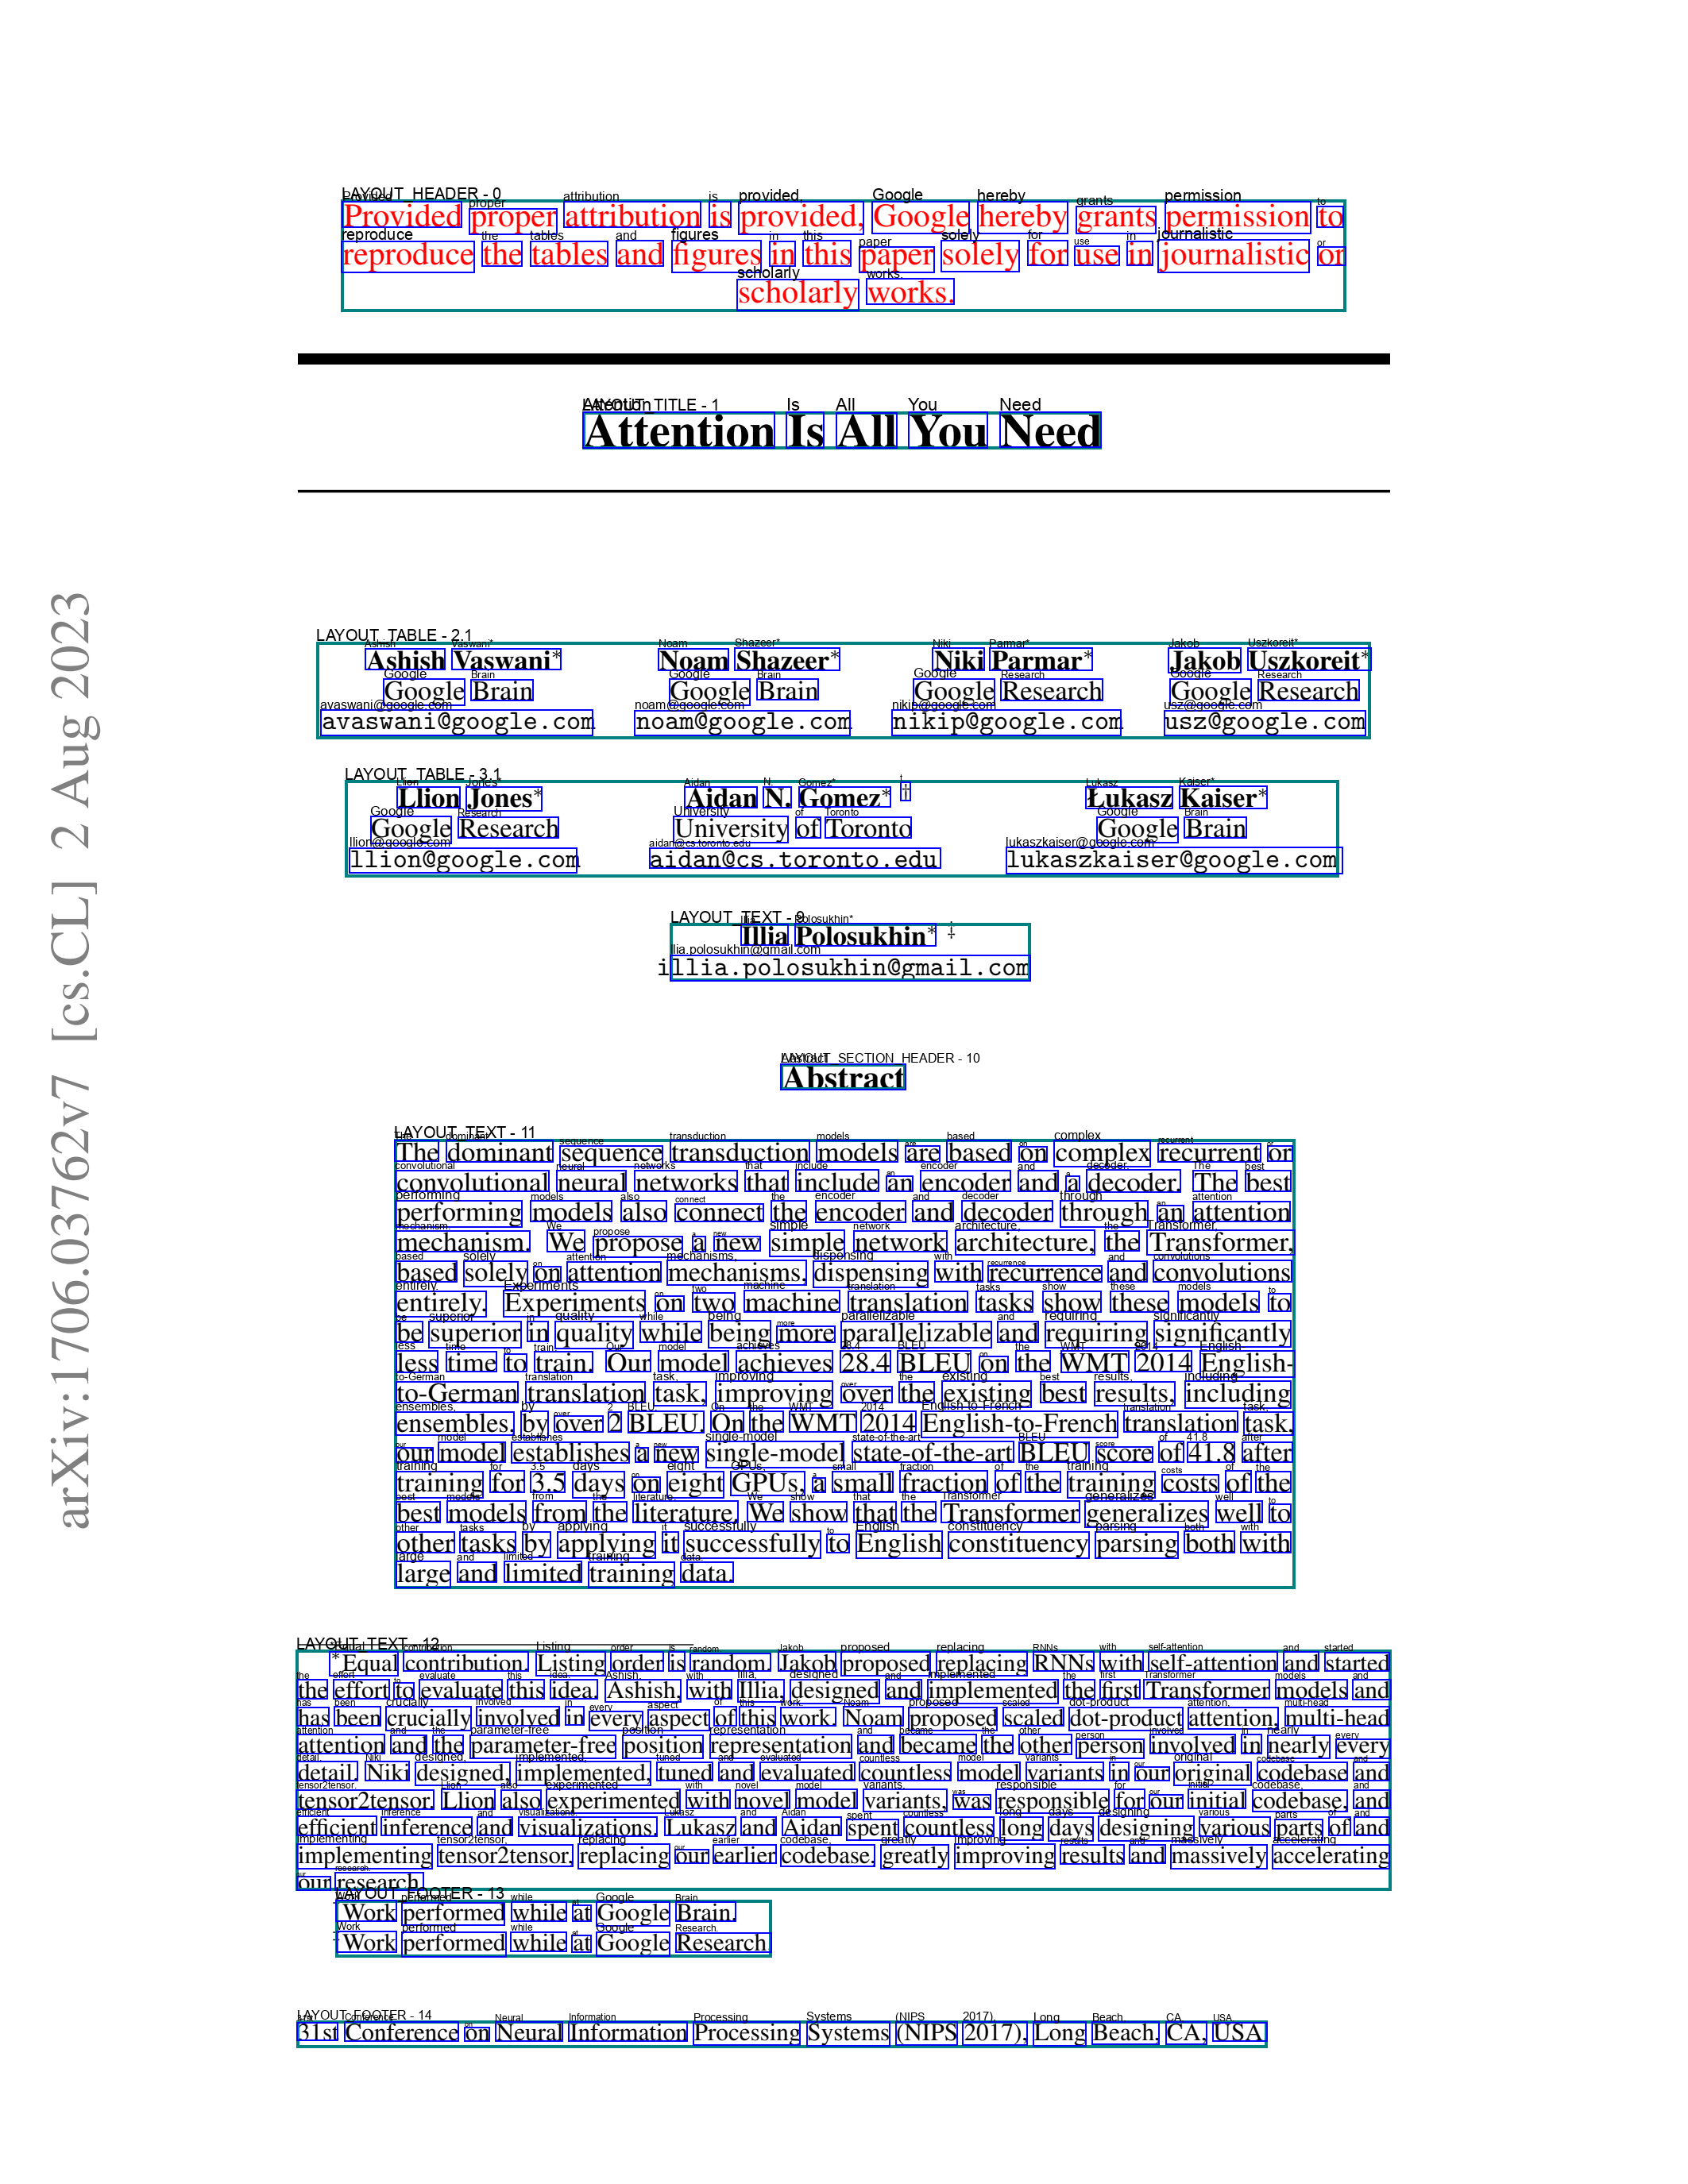

In [9]:
#document.pages[0].page_layout.titles[0].visualize().convert("RGB")
document.pages[0].layouts.visualize().convert("RGB")

## Tabular Data Linearization

* [Samples on tabular data linearization](https://aws-samples.github.io/amazon-textract-textractor/notebooks/tabular_data_linearization.html)

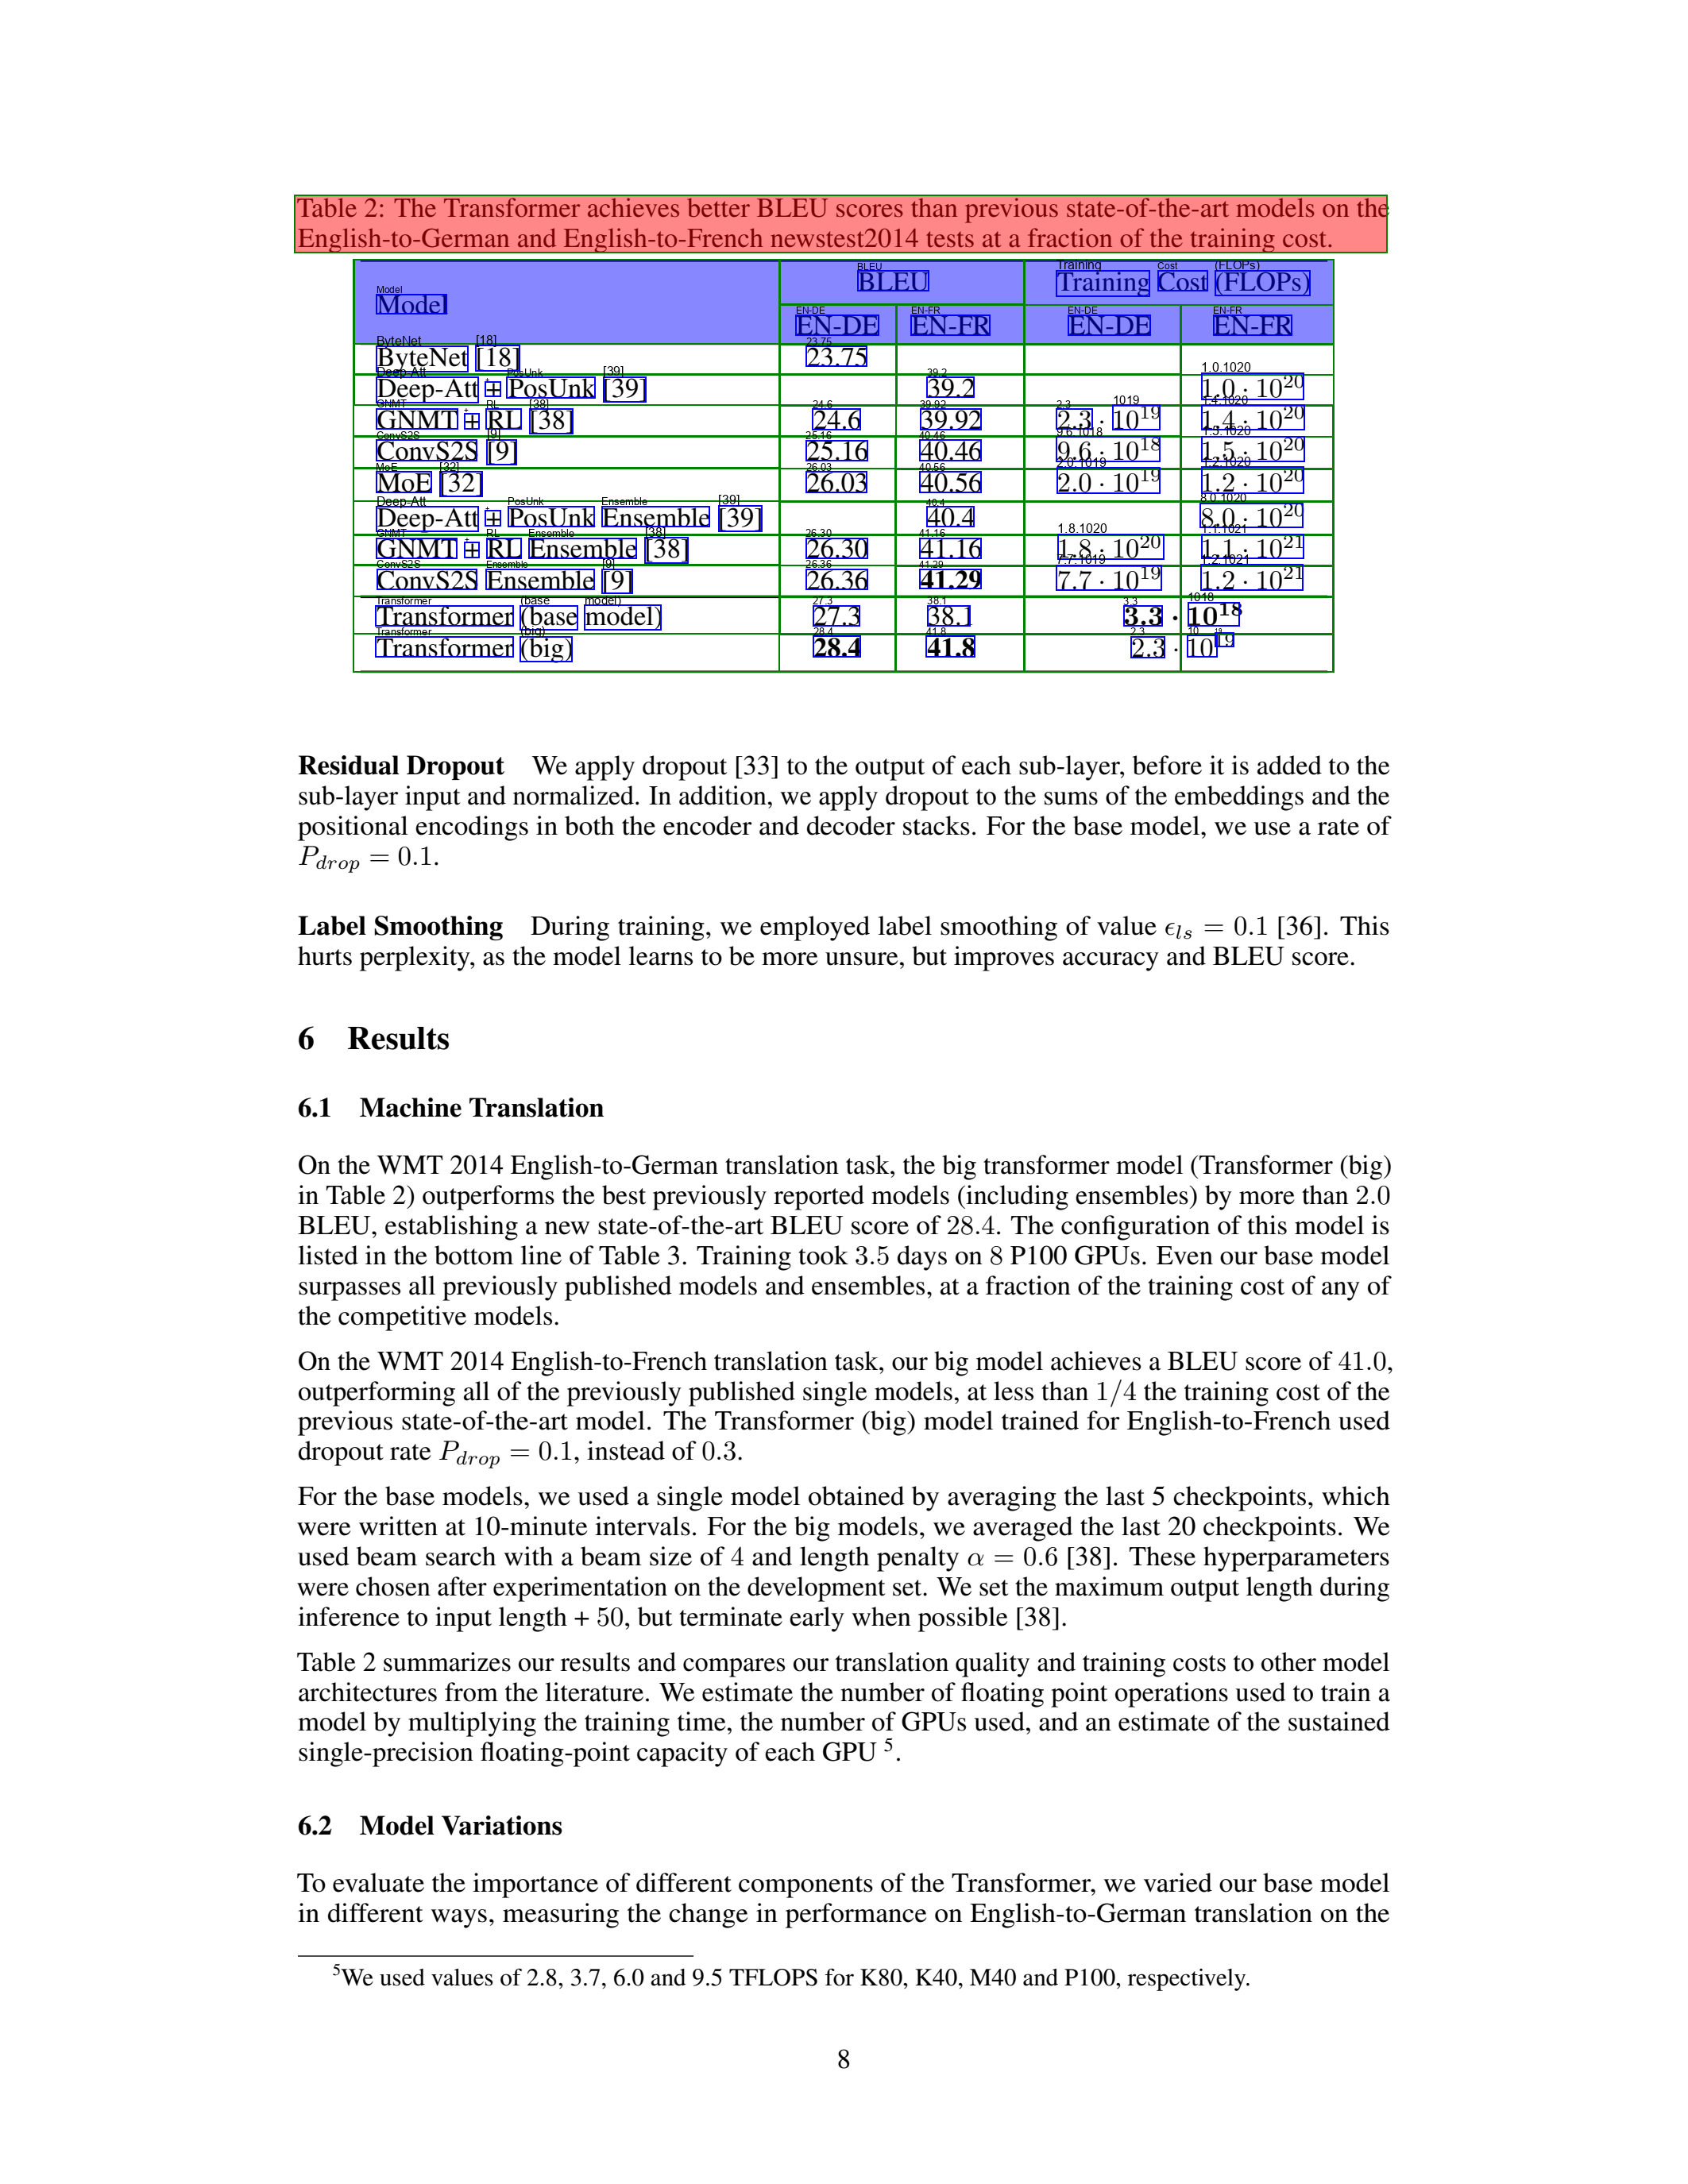

In [10]:
document.tables[3].visualize()

In [11]:
table_aware_text = document.tables[3].get_text(TextLinearizationConfig(table_linearization_format='markdown'))
print(table_aware_text)

| Model                           | BLEU    |       | Training Cost (FLOPs)    |          |
|---------------------------------|---------|-------|--------------------------|----------|
|                                 | EN-DE   | EN-FR | EN-DE                    | EN-FR    |
| ByteNet [18]                    | 23.75   |       |                          |          |
| Deep-Att + PosUnk [39]          |         | 39.2  |                          | 1.0.1020 |
| GNMT + RL [38]                  | 24.6    | 39.92 | 2.3 1019                 | 1.4.1020 |
| ConvS2S [9]                     | 25.16   | 40.46 | 9.6.1018                 | 1.5.1020 |
| MoE [32]                        | 26.03   | 40.56 | 2.0.1019                 | 1.2.1020 |
| Deep-Att + PosUnk Ensemble [39] |         | 40.4  |                          | 8.0.1020 |
| GNMT + RL Ensemble [38]         | 26.30   | 41.16 | 1.8.1020                 | 1.1.1021 |
| ConvS2S Ensemble [9]            | 26.36   | 41.29 | 7.7.1019                 |

In [14]:
dir(layout)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_bbox',
 '_children',
 '_children_type',
 '_confidence',
 '_page',
 '_page_id',
 '_raw_object',
 'add_children',
 'bbox',
 'children',
 'confidence',
 'get_text',
 'get_text_and_words',
 'height',
 'id',
 'layout_type',
 'metadata',
 'page',
 'page_id',
 'raw_object',
 'reading_order',
 'remove',
 'text',
 'to_html',
 'to_markdown',
 'visit',
 'visualize',
 'width',
 'words',
 'x',
 'y']

In [20]:
[(layout.layout_type, layout.get_text()) for layout in document.layouts[:100] if layout.layout_type in ["LAYOUT_FIGURE"] ]

[('LAYOUT_FIGURE',
  'Output\n\nProbabilities\n\nSoftmax \n\nLinear Add & Norm \n\nFeed \n\nForward\n\nAdd & Norm\n\nFeed Add & Norm \n\nMulti-Head\n\nAttention \n\nForward \nNx \n\nNx \n\nMulti-Head Add & Norm \nMasked Add & Norm \n\nMulti-Head \n\nAttention \nAttention \n\nPositional \nPositional \n\nEncoding \nEncoding \n\nInput \nOutput \n\nEmbedding \nEmbedding \n\nInputs \nOutputs (shifted right) \n'),
 ('LAYOUT_FIGURE',
  'MatMul\n\nSoftMax\n\nMask (opt.)\n\nScale\n\nMatMul\n\nQ\nK\nV\n'),
 ('LAYOUT_FIGURE',
  'Multi-Head Attention\n\nLinear \n\nConcat \n\nScaled Dot-Product\n\nh\n\nAttention\n\nLinear V \nLinear Linear K Q \n')]

Iterate over all semantic units
* linearize each unit e.g. as markdow, + each single meta information, section, headers, subsection, location, etc.
* Describe figures, images, diagrams using e.g. Claude 3 vision
* Embed figures, images, diagrams directly using [Titan Image Embeddings](https://docs.aws.amazon.com/bedrock/latest/userguide/titan-multiemb-models.html)

Dataframe with semantic chunking

# Converting to HTML


In [13]:
from IPython.display import display, HTML
html= document.to_html()
display(HTML(html))

# Converting to Markdown

In [16]:
from IPython.display import display, Markdown as md
from ipywidgets import widgets, Layout

myvar = 10
my_md  = md(f"""There are {myvar} **elements** """)

display(widgets.HTML("<b>hello</b>")) # works fine
from IPython.display import display, HTML
markdown= document.to_markdown()
print(markdown)

HTML(value='<b>hello</b>')

Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works. 

# Attention Is All You Need 



| Ashish Vaswani*                  | Noam Shazeer*                | Niki Parmar*                     | Jakob Uszkoreit*               |
|----------------------------------|------------------------------|----------------------------------|--------------------------------|
| Google Brain avaswani@google.com | Google Brain noam@google.com | Google Research nikip@google.com | Google Research usz@google.com |





|                                               |                                                              |                                                     |
|-----------------------------------------------|--------------------------------------------------------------|-----------------------------------------------------|
| Llion Jones* Google Research llion@google.c

In [ ]:
# Get semantic chunks with hierarchical prefixes etc.
* get each chunk (paragraph), and add the metadata (page_number, bounding_box, hierarchy list)
 sample: hierarchy list: [(header, text),(section, text), (subsection, text)]
* For each figure add a placeholder to call vision llm to get the description